# Perceptron et classe Linéaire

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mltools import plot_data, plot_frontiere, make_grid, gen_arti

    

class Lineaire(object):
    def __init__(self,loss=perceptron_loss,loss_g=perceptron_grad,max_iter=100,eps=0.01, proj = None):
        self.max_iter, self.eps = max_iter,eps
        self.w = None
        self.loss,self.loss_g = loss,loss_g
        self.proj = proj
        
    def fit(self,datax,datay):
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = len(datay)
        self.w = np.random.rand(datax.shape[1],1)
        print(self.w.shape)
        costs=[]
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            self.w = self.w - self.eps * gradient
            #print(self.w.shape)
            
        return self.w, costs
    
    def fit_stochastique(self,datax,datay):
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = len(datay)
        self.w = np.random.rand(datax.shape[1],1)
        print(self.w.shape)
        costs=[]
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            ind = np.random.randint(len(datax))
            self.w -= self.eps*self.loss_g(self.w, datax[ind],datay[ind])
            #print(self.w.shape)
            
        return self.w, costs
    
    def fit_mini_batch(self,datax,datay,batch_size):
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = len(datay)
        self.w = np.random.rand(datax.shape[1],1)
        print(self.w.shape)
        costs=[]
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            inds = np.random.randint(len(datax),size=batch_size)
            #print(inds)
            self.w -= self.eps * self.loss_g(self.w, datax[inds], datay[inds])
            #print(self.w.shape)
            
        return self.w, costs

    def predict(self,datax):
        if(self.proj!=None):
            datax = self.proj(datax)
        if len(datax.shape) == 1:
            datax = datax.reshape(1,-1)
        if self.bias:
            datax = np.hstack((datax, np.ones((datax.shape[0], 1))))
        return datax.dot(self.w)

    def score(self,datax,datay):
        return np.mean(np.where(datay - self.predict(datax) == 0, 1, 0))
    
    
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")



if __name__ =="__main__":
    uspsdatatrain = "data/USPS_train.txt"
    uspsdatatest = "data/USPS_test.txt"
    alltrainx,alltrainy = load_usps(uspsdatatrain)
    alltestx,alltesty = load_usps(uspsdatatest)
    neg = 5
    pos = 6
    datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
    testx,testy = get_usps([neg,pos],alltestx,alltesty)


In [265]:
def perceptron_loss(w, x, y):
    return np.maximum(0,-y*np.dot(x,w))

def perceptron_grad(w, x, y):
    m = np.sign(np.maximum(0,-y*np.dot(x, w)))
    return np.mean(m*(-y*x),axis=0).reshape(-1,1)

### Tests sur des données gen_arti

In [303]:
datax, datay = gen_arti(data_type = 0, epsilon=1)

(2, 1)


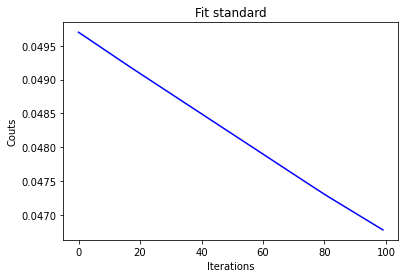

In [304]:
perceptron = Lineaire()
_, costs = perceptron.fit(datax,datay)
plt.figure()
plt.title("Fit standard")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

(2, 1)


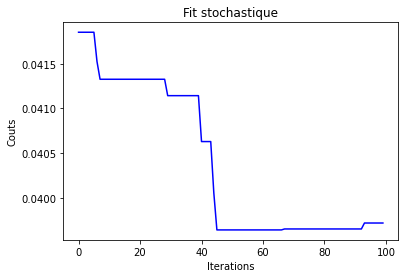

In [305]:
perceptron = Lineaire()
_, costs = perceptron.fit_stochastique(datax,datay)
plt.figure()
plt.title("Fit stochastique")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

(2, 1)


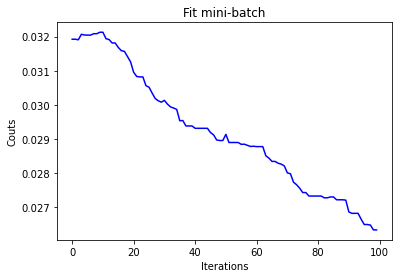

In [306]:
perceptron = Lineaire()
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plt.figure()
plt.title("Fit mini-batch")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

# Partie Données USP + Mini batch et descente stochastique

(256, 1)


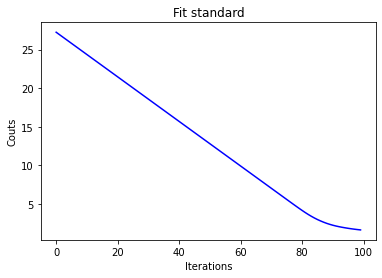

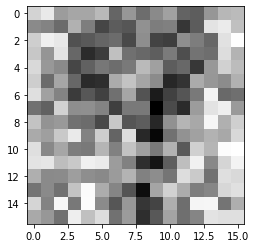

In [270]:
neg = 9
pos = 6
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)
datay = np.where(datay==neg,-1,1)
perceptron = Lineaire()
_, costs = perceptron.fit(datax,datay)
plt.figure()
plt.title("Fit standard")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()
show_usps(perceptron.w)

(256, 1)


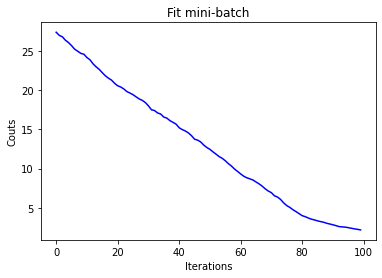

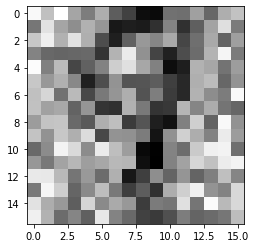

In [271]:
neg = 9
pos = 6
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)
datay = np.where(datay==neg,-1,1)
perceptron = Lineaire()
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plt.figure()
plt.title("Fit mini-batch")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()
show_usps(perceptron.w)

(256, 1)


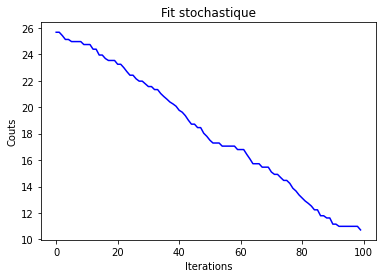

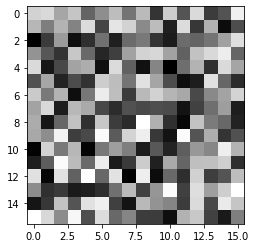

In [272]:
neg = 9
pos = 6
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)
datay = np.where(datay==neg,-1,1)
perceptron = Lineaire()
_, costs = perceptron.fit_stochastique(datax,datay)
plt.figure()
plt.title("Fit stochastique")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()
show_usps(perceptron.w)

# Projections et pénalisation

In [277]:
def proj_poly(datax):
    return np.concatenate(([[1]]*datax.shape[0],datax,datax**2),axis = 1)

def proj_biais(datax):
    return np.concatenate(([[1]]*datax.shape[0],datax),axis = 1)

def proj_gauss(datax, base, sigma):
    pass

### Data type  == 1

In [309]:
datax, datay = gen_arti(data_type = 1, epsilon=1)

(5, 1)


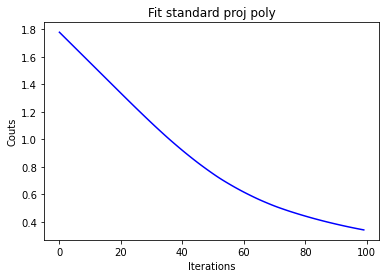

(3, 1)


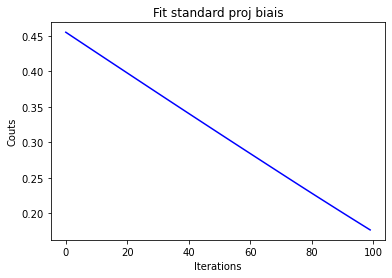

In [310]:
perceptron = Lineaire(proj = proj_poly)
_, costs = perceptron.fit(datax,datay)
plt.figure()
plt.title("Fit standard proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

perceptron = Lineaire(proj = proj_biais)
_, costs = perceptron.fit(datax,datay)
plt.figure()
plt.title("Fit standard proj biais")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()
#show_usps(perceptron.w)

(5, 1)


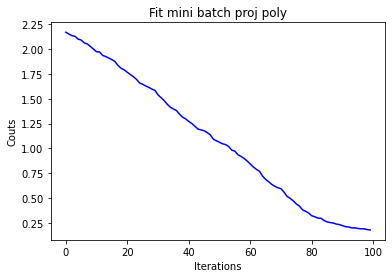

(3, 1)


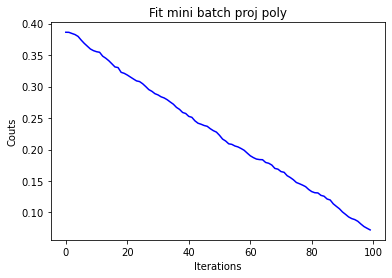

In [311]:
perceptron = Lineaire(proj = proj_poly)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plt.figure()
plt.title("Fit mini batch proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

perceptron = Lineaire(proj = proj_biais)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plt.figure()
plt.title("Fit mini batch proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()


(5, 1)


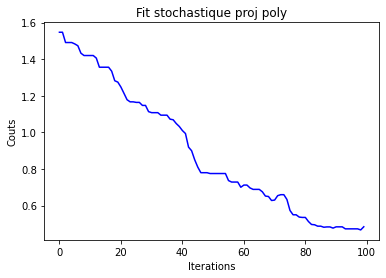

(3, 1)


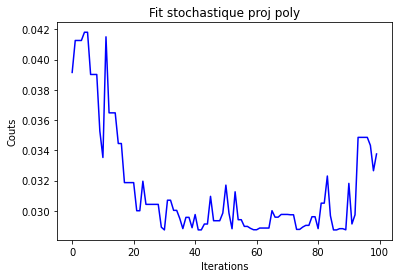

In [312]:
perceptron = Lineaire(proj = proj_poly)
_, costs = perceptron.fit_stochastique(datax,datay)
plt.figure()
plt.title("Fit stochastique proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

perceptron = Lineaire(proj = proj_biais)
_, costs = perceptron.fit_stochastique(datax,datay)
plt.figure()
plt.title("Fit stochastique proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

### Data type  == 2

In [314]:
datax, datay = gen_arti(data_type = 2, epsilon=1)

(5, 1)


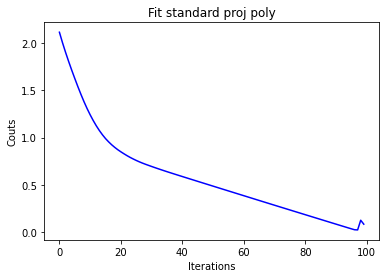

(3, 1)


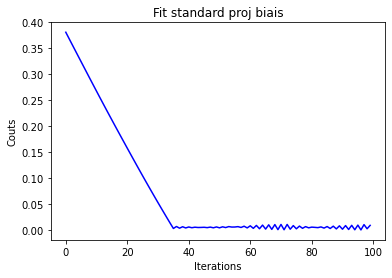

In [315]:
perceptron = Lineaire(proj = proj_poly)
_, costs = perceptron.fit(datax,datay)
plt.figure()
plt.title("Fit standard proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

perceptron = Lineaire(proj = proj_biais)
_, costs = perceptron.fit(datax,datay)
plt.figure()
plt.title("Fit standard proj biais")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()
#show_usps(perceptron.w)

(5, 1)


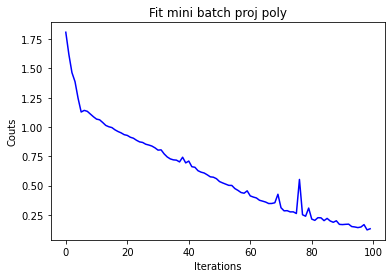

(3, 1)


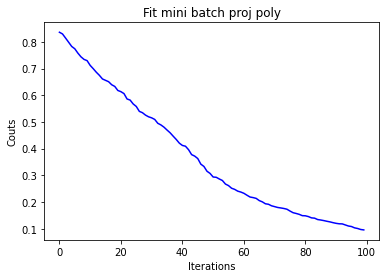

In [316]:
perceptron = Lineaire(proj = proj_poly)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plt.figure()
plt.title("Fit mini batch proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

perceptron = Lineaire(proj = proj_biais)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plt.figure()
plt.title("Fit mini batch proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

(5, 1)


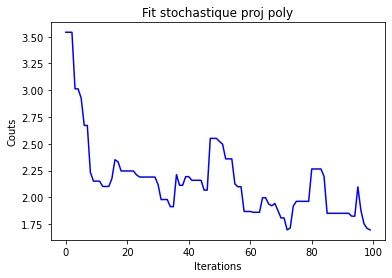

(3, 1)


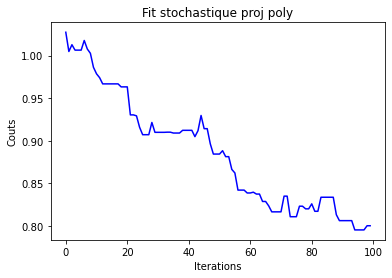

In [317]:
perceptron = Lineaire(proj = proj_poly)
_, costs = perceptron.fit_stochastique(datax,datay)
plt.figure()
plt.title("Fit stochastique proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()

perceptron = Lineaire(proj = proj_biais)
_, costs = perceptron.fit_stochastique(datax,datay)
plt.figure()
plt.title("Fit stochastique proj poly")
plt.ylabel("Couts")
plt.xlabel("Iterations")
values = np.arange(len(costs))
plt.plot(values,costs,color="blue")
plt.show()